In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

def print_tree(start_path, indent=""):
    # List all the files and directories in the current path
    for item in os.listdir(start_path):
        item_path = os.path.join(start_path, item)
        if os.path.isdir(item_path):
            # If the item is a directory, print its name and recurse
            print(f"{indent}📁 {item}")
            print_tree(item_path, indent + "    ")
        else:
            # If the item is a file, print its name
            print(f"{indent}📄 {item}")

# Set the path to your target folder
target_folder = "/content/drive/MyDrive/Brain2 fmri"

# Print the tree structure
print_tree(target_folder)


📁 sub-01
    📁 ses_1
        📄 sub-01_ses-01_task-inner_bold.nii
        📄 sub-01_ses-01_task-inner_bold.json
        📄 sub-01_ses-01_task-inner_events.json
        📄 sub-01_ses-01_task-inner_events.tsv
        📄 brain_mask.nii.gz
    📁 ses_2
        📄 sub-01_ses-02_task-inner_bold.nii
        📄 sub-01_ses-02_task-inner_events.tsv
        📄 sub-01_ses-02_task-inner_events.json
        📄 sub-01_ses-02_task-inner_bold.json
📁 sub-2
    📁 ses_1
        📄 sub-02_ses-01_task-inner_bold.nii
        📄 sub-02_ses-01_task-inner_events.tsv
        📄 sub-02_ses-01_task-inner_events.json
        📄 sub-02_ses-01_task-inner_bold.json
    📁 ses_2
        📄 sub-02_ses-02_task-inner_bold.nii
        📄 sub-02_ses-02_task-inner_bold.json
        📄 sub-02_ses-02_task-inner_events.json
        📄 sub-02_ses-02_task-inner_events.tsv
📁 sub-3
    📁 ses_1
        📄 sub-03_ses-01_task-inner_bold.nii
        📄 sub-03_ses-01_task-inner_events.tsv
        📄 sub-03_ses-01_task-inner_events.json
        📄 sub-03_ses-0

In [ ]:
import os

# Define the folder path
folder_path = "/content/drive/MyDrive/Brain2 fmri"

# Dictionaries to store files
nii_files = {}
tsv_files = {}

# Function to traverse and collect files
def collect_files(start_path):
    for root, dirs, files in os.walk(start_path):
        for file in files:
            if file.endswith(".nii"):
                # Store NII files
                subject_session = os.path.basename(os.path.dirname(root)) + "_" + os.path.basename(root)
                nii_files[f"{subject_session}_nii"] = os.path.join(root, file)
            elif file.endswith("_events.tsv"):
                # Store TSV files
                subject_session = os.path.basename(os.path.dirname(root)) + "_" + os.path.basename(root)
                tsv_files[f"{subject_session}_events_tsv"] = os.path.join(root, file)

# Collect files
collect_files(folder_path)

# Print the variable names and their contents
print("NII Files Variable Names and Paths:")
for key, value in nii_files.items():
    print(f"{key}: {value}")

print("\nTSV Files Variable Names and Paths:")
for key, value in tsv_files.items():
    print(f"{key}: {value}")


NII Files Variable Names and Paths:
sub-01_ses_1_nii: /content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii
sub-01_ses_2_nii: /content/drive/MyDrive/Brain2 fmri/sub-01/ses_2/sub-01_ses-02_task-inner_bold.nii
sub-2_ses_1_nii: /content/drive/MyDrive/Brain2 fmri/sub-2/ses_1/sub-02_ses-01_task-inner_bold.nii
sub-2_ses_2_nii: /content/drive/MyDrive/Brain2 fmri/sub-2/ses_2/sub-02_ses-02_task-inner_bold.nii
sub-3_ses_1_nii: /content/drive/MyDrive/Brain2 fmri/sub-3/ses_1/sub-03_ses-01_task-inner_bold.nii
sub-3_ses_2_nii: /content/drive/MyDrive/Brain2 fmri/sub-3/ses_2/sub-03_ses-02_task-inner_bold.nii
sub-5_ses_1_nii: /content/drive/MyDrive/Brain2 fmri/sub-5/ses_1/sub-05_ses-01_task-inner_bold.nii
sub-5_ses_2_nii: /content/drive/MyDrive/Brain2 fmri/sub-5/ses_2/sub-05_ses-02_task-inner_bold.nii

TSV Files Variable Names and Paths:
sub-01_ses_1_events_tsv: /content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_events.tsv
sub-01_ses_2_events_tsv: /cont

In [ ]:
import nibabel as nib
import pandas as pd
import json

# File paths for sub-01 ses-1
nii_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
json_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.json"
tsv_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_events.tsv"

# Load and print shape of .nii file
nii_img = nib.load(nii_path)
print(f"Shape of sub-01 ses-1 NII file: {nii_img.shape}")

# Load and print content of .json file
with open(json_path, 'r') as f:
    bold_metadata = json.load(f)
print(f"Content of BOLD JSON file:\n{bold_metadata}")

print("----")
print("events tsv:")
events_df = pd.read_csv(tsv_path, sep='\t')
print(events_df)


Shape of sub-01 ses-1 NII file: (100, 100, 68, 1039)
Content of BOLD JSON file:
{'TaskName': 'InnerSpeech', 'Modality': 'MR', 'MagneticFieldStrength': 3, 'ImagingFrequency': 123.26, 'Manufacturer': 'Siemens', 'ManufacturersModelName': 'Prisma', 'InstitutionName': 'SUBIC', 'InstitutionalDepartmentName': 'Department', 'InstitutionAddress': 'Svante Arrhenius vaeg 16,Stockholm,District,SE,11418', 'DeviceSerialNumber': '166088', 'StationName': 'AWP166088', 'BodyPartExamined': 'BRAIN', 'PatientPosition': 'HFS', 'ProcedureStepDescription': 'Foteini Liwicki^Foteini', 'SoftwareVersions': 'syngo MR E11', 'MRAcquisitionType': '2D', 'SeriesDescription': 'cmrr_s2_p2_2mm', 'ProtocolName': 'cmrr_s2_p2_2mm', 'ScanningSequence': 'EP', 'SequenceVariant': 'SK\\SS', 'ScanOptions': 'FS', 'SequenceName': 'epfid2d1_100', 'ImageType': ['ORIGINAL', 'PRIMARY', 'M', 'MB', 'ND', 'NORM', 'MOSAIC'], 'SeriesNumber': 8, 'AcquisitionTime': '13:34:13.122500', 'AcquisitionNumber': 1, 'ImageComments': 'Unaliased MB2/PE4/

In [ ]:
# Load and display first few rows of .tsv file
events_df = pd.read_csv(tsv_path, sep='\t')
events_df

,onset,duration,trial_type
0,0.000,1.992,NaN
1,1.992,14.000,four
2,15.992,14.000,child
3,29.992,13.999,father
4,43.991,14.000,father
...,...,...,...
156,2171.990,14.000,father
157,2185.990,14.000,child
158,2199.990,14.000,three
159,2213.990,14.000,four


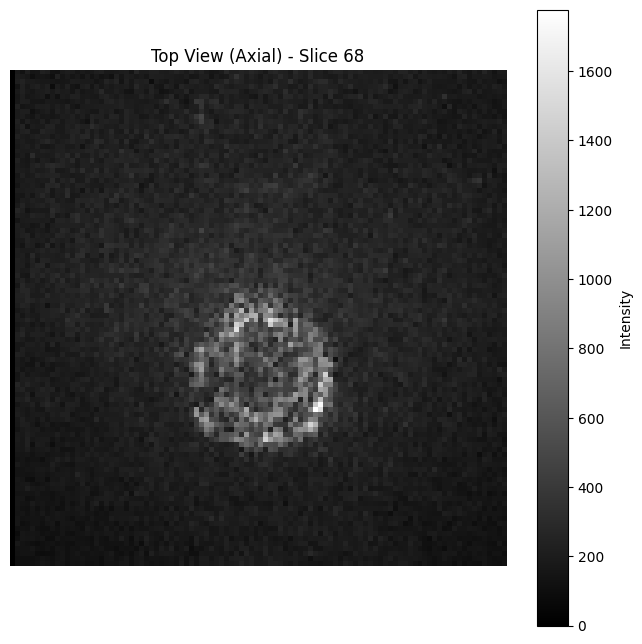

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the NII file
nii_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
nii_img = nib.load(nii_path)

# Get the data as a NumPy array
data = nii_img.get_fdata()

# Select the 68th slice along the z-axis (axial view)
slice_index = 67  # Python is 0-indexed, so 68th slice is at index 67
slice_data = data[:, :, slice_index, 0]  # Assuming first timepoint (index 0)

# Plot the slice
plt.figure(figsize=(8, 8))
plt.imshow(slice_data.T, cmap="gray", origin="lower")  # Transpose for correct orientation
plt.title(f"Top View (Axial) - Slice {slice_index + 1}")
plt.colorbar(label="Intensity")
plt.axis("off")
plt.show()


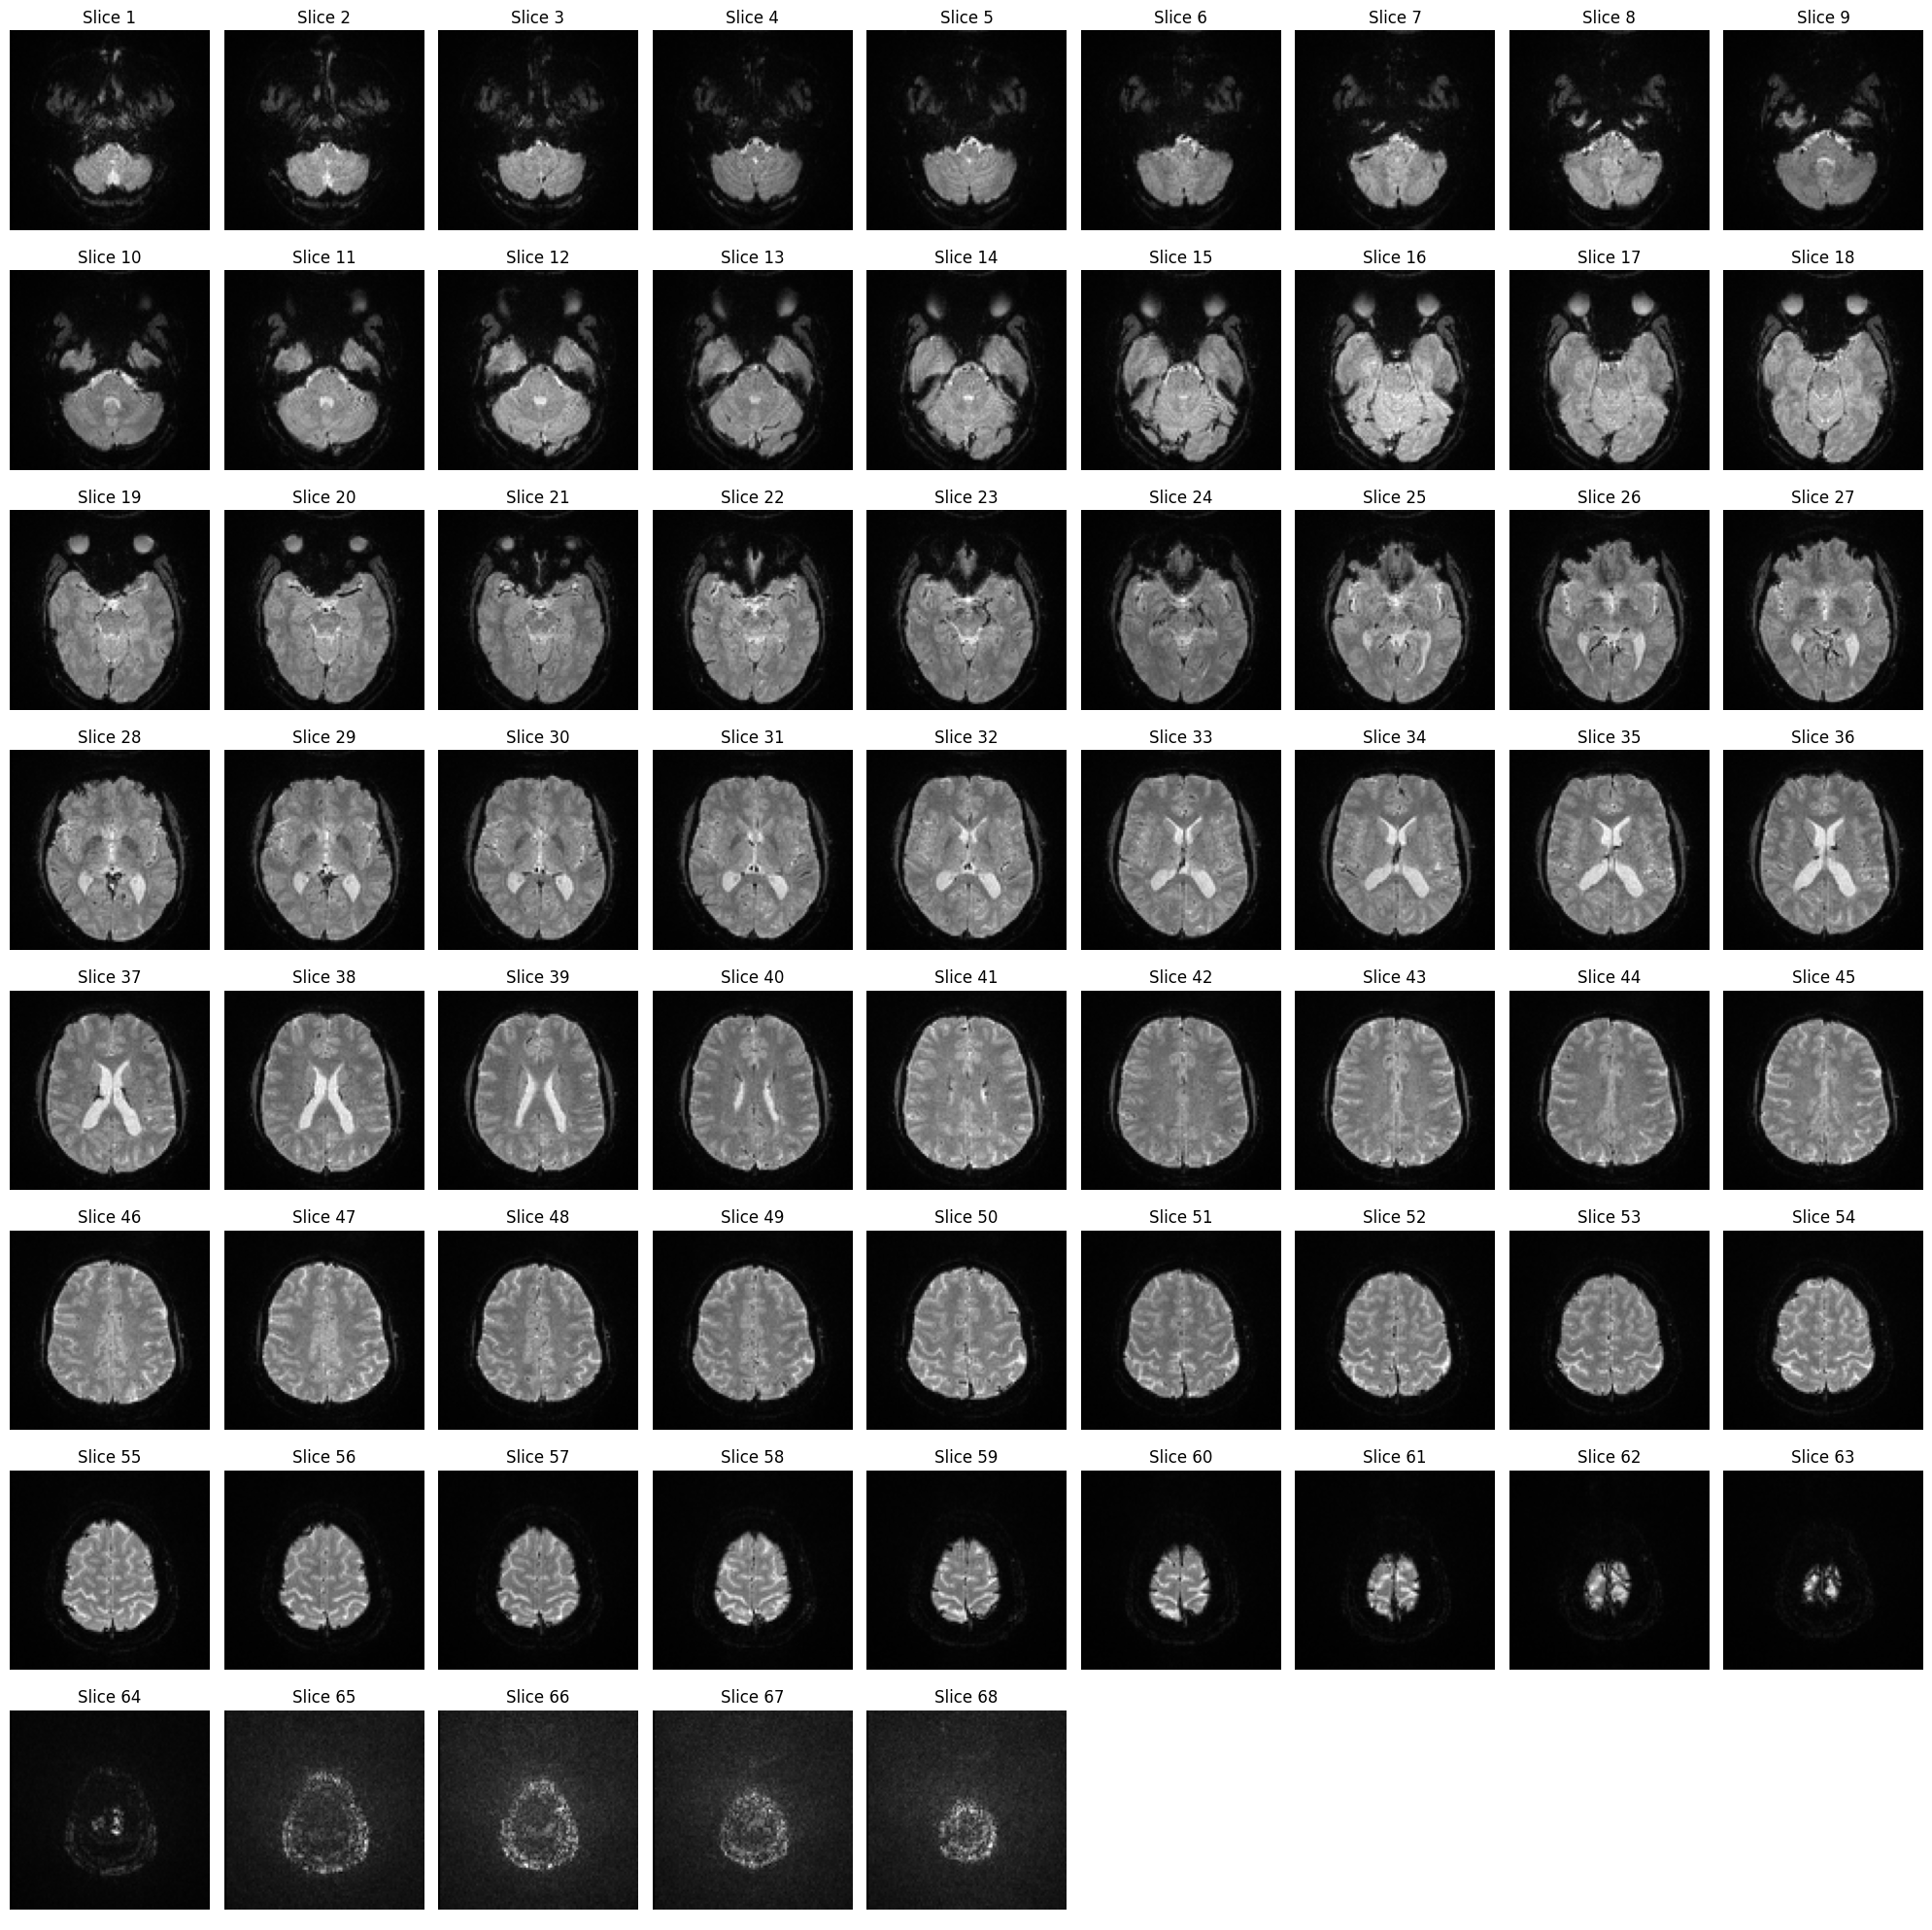

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the NII file
nii_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
nii_img = nib.load(nii_path)

# Get the data as a NumPy array
data = nii_img.get_fdata()

# Define the number of slices
num_slices = data.shape[2]  # Total slices along the z-axis

# Plot all slices
fig, axes = plt.subplots(nrows=8, ncols=9, figsize=(20, 20))  # Grid for displaying 68 slices
axes = axes.flatten()

for i in range(num_slices):
    if i >= len(axes):
        break
    slice_data = data[:, :, i, 0]  # Assuming first timepoint (index 0)
    axes[i].imshow(slice_data.T, cmap="gray", origin="lower")  # Transpose for correct orientation
    axes[i].set_title(f"Slice {i + 1}")
    axes[i].axis("off")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


# Pre-Process
1. Brain Extraction (remove akll nmon brain parts)


In [ ]:
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python3 fslinstaller.py
!source /etc/fsl/fsl.sh


--2024-12-25 09:01:09--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.66
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74517 (73K) [application/octet-stream]
Saving to: ‘fslinstaller.py’

fslinstaller.py     100%[===================>]  72.77K   340KB/s    in 0.2s    

2024-12-25 09:01:10 (340 KB/s) - ‘fslinstaller.py’ saved [74517/74517]

FSL installer version: 3.2.0
Press CTRL+C at any time to cancel installation
Running the installer script as root user is discouraged! You should run this script as a regular user - you will be asked for your administrator password if required.
Installation log file: /tmp/fslinstaller_p9hcwp2e.log

FSL installer version: 3.15.2
Press CTRL+C at any time to cancel installation
Running the installer script as root user is discouraged! You should run this script as a
regular user - you w

In [ ]:
import os
import subprocess

# Define paths for input files and output directories
nii_files = {
    "sub-01_ses_1": "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii",
    "sub-01_ses_2": "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_2/sub-01_ses-02_task-inner_bold.nii",
    "sub-2_ses_1": "/content/drive/MyDrive/Brain2 fmri/sub-2/ses_1/sub-02_ses-01_task-inner_bold.nii",
    "sub-2_ses_2": "/content/drive/MyDrive/Brain2 fmri/sub-2/ses_2/sub-02_ses-02_task-inner_bold.nii",
    "sub-3_ses_1": "/content/drive/MyDrive/Brain2 fmri/sub-3/ses_1/sub-03_ses-01_task-inner_bold.nii",
    "sub-3_ses_2": "/content/drive/MyDrive/Brain2 fmri/sub-3/ses_2/sub-03_ses-02_task-inner_bold.nii",
    "sub-5_ses_1": "/content/drive/MyDrive/Brain2 fmri/sub-5/ses_1/sub-05_ses-01_task-inner_bold.nii",
    "sub-5_ses_2": "/content/drive/MyDrive/Brain2 fmri/sub-5/ses_2/sub-05_ses-02_task-inner_bold.nii",
}

# Output directory for extracted brain images
output_dir = "/content/drive/MyDrive/Brain2 fmri/brain_extracted"
os.makedirs(output_dir, exist_ok=True)

# Perform brain extraction using BET
for session, nii_path in nii_files.items():
    output_path = os.path.join(output_dir, f"{session}_brain.nii.gz")
    bet_command = f"bet {nii_path} {output_path} -f 0.5 -g 0"
    print(f"Running: {bet_command}")
    subprocess.run(bet_command, shell=True, check=True)

print("Brain extraction completed for all files.")


Running: bet /content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii /content/drive/MyDrive/Brain2 fmri/brain_extracted/sub-01_ses_1_brain.nii.gz -f 0.5 -g 0


CalledProcessError: Command 'bet /content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii /content/drive/MyDrive/Brain2 fmri/brain_extracted/sub-01_ses_1_brain.nii.gz -f 0.5 -g 0' returned non-zero exit status 127.

In [ ]:
!apt-get update
!apt-get install -y afni



Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/univer

In [ ]:
import os
import subprocess

# Define input and output file paths
input_file = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
output_file = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_extracted.nii.gz"

# Run 3dSkullStrip
skullstrip_command = f"3dSkullStrip -input {input_file} -prefix {output_file}"
subprocess.run(skullstrip_command, shell=True, check=True)

print(f"Brain extraction completed. Saved to {output_file}")


CalledProcessError: Command '3dSkullStrip -input /content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii -prefix /content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_extracted.nii.gz' returned non-zero exit status 127.

In [ ]:
!pip install deepbrain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.6/677.6 kB 7.7 MB/s eta 0:00:00


In [ ]:
from deepbrain import Extractor
import nibabel as nib
import numpy as np

# Load the NIfTI file
nii_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
img = nib.load(nii_path)
data = img.get_fdata()

# Initialize the extractor
ext = Extractor()

# Extract the brain mask
mask = ext.run(data)

# Apply the mask
brain_data = data * mask

# Save the brain-extracted image
brain_img = nib.Nifti1Image(brain_data, affine=img.affine)
nib.save(brain_img, "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_extracted.nii.gz")

print("Brain extraction completed.")


AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
pip install nibabel nilearn tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 88.3 MB/s eta 0:00:00


In [ ]:
from nilearn.masking import compute_brain_mask, apply_mask
import nibabel as nib

# Load the NIfTI file
nii_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
img = nib.load(nii_path)

# Compute the brain mask
brain_mask = compute_brain_mask(img)

# Apply the brain mask to extract brain data
brain_data = apply_mask(img, brain_mask)

# Save the brain-extracted NIfTI image
brain_img = nib.Nifti1Image(brain_data, affine=img.affine)
output_file = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_extracted.nii.gz"
nib.save(brain_img, output_file)

print(f"Brain extraction completed and saved to {output_file}.")



In [ ]:

import nibabel as nib
from nilearn.masking import compute_brain_mask, apply_mask

# Load the NIfTI file
nii_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
img = nib.load(nii_path)

# Compute the brain mask
brain_mask = compute_brain_mask(img)

# Save the brain mask (optional)
brain_mask.to_filename("/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_mask.nii.gz")

# Apply the brain mask
masked_img = apply_mask(img, brain_mask)

# Save the brain-extracted image
nib.save(masked_img, "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_extracted.nii.gz")

print("Brain extraction completed.")

AttributeError: 'numpy.ndarray' object has no attribute 'to_filename'

In [ ]:
import time
from tqdm import tqdm
import nibabel as nib
from nilearn.masking import compute_brain_mask, unmask

# Start time tracking
start_time = time.time()

# File paths
nii_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"
output_mask_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_mask.nii.gz"
output_brain_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_extracted.nii.gz"

# Load the NIfTI file
print("Loading the NIfTI file...")
img = nib.load(nii_path)

# Compute the brain mask with progress tracking
print("Computing the brain mask...")
with tqdm(total=1, desc="Brain Mask Computation") as pbar:
    brain_mask = compute_brain_mask(img)
    pbar.update(1)

# Save the brain mask
print(f"Saving brain mask to {output_mask_path}...")
brain_mask.to_filename(output_mask_path)

# Apply the brain mask to extract brain voxels
print("Applying brain mask to extract brain voxels...")
with tqdm(total=1, desc="Brain Extraction") as pbar:
    masked_img_data = img.get_fdata() * brain_mask.get_fdata()  # Element-wise masking
    brain_extracted_img = nib.Nifti1Image(masked_img_data, img.affine)
    pbar.update(1)

# Save the brain-extracted image
print(f"Saving brain-extracted image to {output_brain_path}...")
brain_extracted_img.to_filename(output_brain_path)

# End time tracking
end_time = time.time()
print(f"Brain extraction completed in {end_time - start_time:.2f} seconds.")


Loading the NIfTI file...
Computing the brain mask...


Brain Mask Computation: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


Saving brain mask to /content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/brain_mask.nii.gz...
Applying brain mask to extract brain voxels...


Brain Extraction:   0%|          | 0/1 [00:23<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (100,100,68,1039) (100,100,68) 

In [ ]:


# Import libraries
import nibabel as nib
from nilearn import image, masking
import numpy as np
from tqdm import tqdm

# Progress tracker
steps = [
    "Loading NIfTI file",
    "Skull-stripping",
    "Intensity normalization",
    "Temporal smoothing (optional)",
    "Saving preprocessed data"
]

def update_progress(step_idx, steps):
    progress = int((step_idx + 1) / len(steps) * 100)
    print(f"Step {step_idx + 1}/{len(steps)}: {steps[step_idx]}... {progress}% done")

# Path to the fMRI dataset
fmri_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"

# Step 1: Load the NIfTI file
update_progress(0, steps)
fmri_img = nib.load(fmri_path)

# Step 2: Skull-stripping
update_progress(1, steps)
mask_img = masking.compute_brain_mask(fmri_img)

# Fix dimension mismatch and apply the mask
mask_4d = np.repeat(mask_img.get_fdata()[:, :, :, np.newaxis], fmri_img.shape[-1], axis=-1)
masked_data = fmri_img.get_fdata() * mask_4d
masked_img = nib.Nifti1Image(masked_data, fmri_img.affine)

# Continue with the remaining steps
# Step 3: Intensity Normalization (Z-score)
update_progress(2, steps)
data = masked_img.get_fdata()
mean_intensity = np.mean(data)
std_intensity = np.std(data)
normalized_data = (data - mean_intensity) / std_intensity
normalized_img = nib.Nifti1Image(normalized_data, fmri_img.affine)

# Step 4: Temporal Smoothing (Optional Light Denoising)
update_progress(3, steps)
smoothed_img = image.smooth_img(normalized_img, fwhm=4)  # Smoothing with 4mm kernel

# Step 5: Save Preprocessed Data
update_progress(4, steps)
output_path = "/content/drive/MyDrive/Brain2 fmri/preprocessed_fmri_fast.nii"
nib.save(smoothed_img, output_path)
print(f"Preprocessed fMRI saved at {output_path}")


Step 1/5: Loading NIfTI file... 20% done
Step 2/5: Skull-stripping... 40% done


In [ ]:
import nibabel as nib
from nilearn import image, masking
import numpy as np

# Path to the fMRI dataset
fmri_path = "/content/drive/MyDrive/Brain2 fmri/sub-01/ses_1/sub-01_ses-01_task-inner_bold.nii"

# Load the fMRI dataset
fmri_img = nib.load(fmri_path)

# Load the brain mask
mask_img = masking.compute_brain_mask(fmri_img)

# Expand the mask to 4D (to match the fMRI data)
mask_4d = np.repeat(mask_img.get_fdata()[:, :, :, np.newaxis], fmri_img.shape[-1], axis=-1)

# Process one timepoint at a time to reduce memory usage
masked_data = np.zeros_like(fmri_img.get_fdata())

for t in range(fmri_img.shape[-1]):
    # Apply mask to each timepoint and process it incrementally
    masked_data[..., t] = fmri_img.get_fdata()[..., t] * mask_4d[..., t]

# Convert the masked data back to a NIfTI image
masked_img = nib.Nifti1Image(masked_data, fmri_img.affine)

# Save intermediate result (masked fMRI)
nib.save(masked_img, '/content/drive/MyDrive/Brain2 fmri/masked_fmri.nii')

# Perform intensity normalization (Z-score)
data = masked_img.get_fdata()
mean_intensity = np.mean(data)
std_intensity = np.std(data)
normalized_data = (data - mean_intensity) / std_intensity
normalized_img = nib.Nifti1Image(normalized_data, fmri_img.affine)

# Optional: Smooth the data (use a smaller kernel size if needed)
smoothed_img = image.smooth_img(normalized_img, fwhm=2)

# Save the final preprocessed image
output_path = "/content/drive/MyDrive/Brain2 fmri/preprocessed_fmri_fast.nii"
nib.save(smoothed_img, output_path)

print(f"Preprocessed fMRI saved at {output_path}")
